In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
data_dir = "/kaggle/input/imagedata"

In [3]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 80% training, 20% validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)


Found 837 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


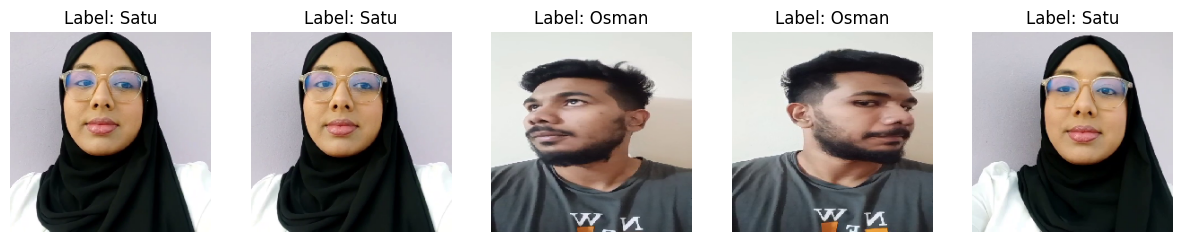

In [11]:
def display_sample_images(generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i]
        label = class_names[int(labels[i])]
        
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

# Show some sample images
display_sample_images(train_generator)


In [12]:
base_model = tf.keras.applications.MobileNetV2(
    weights=None,  # Do not load pretrained weights
    include_top=False,
    input_shape=(224, 224, 3)
)


In [14]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.9169 - loss: 0.1689 - val_accuracy: 0.4258 - val_loss: 0.6993
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.5742 - val_loss: 0.6926
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.9956 - loss: 0.0078 - val_accuracy: 0.5742 - val_loss: 0.6870
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.9966 - loss: 0.0141 - val_accuracy: 0.5742 - val_loss: 0.6828
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.5742 - val_loss: 0.6890


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


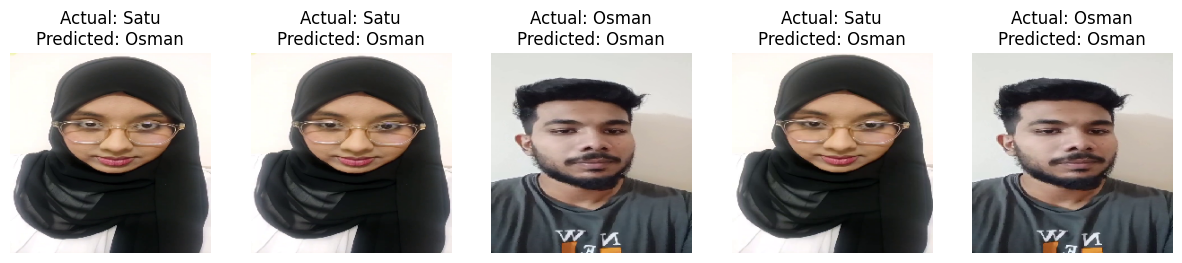

In [23]:
def visualize_predictions(model, generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i]
        true_label = class_names[int(labels[i])]
        predicted_label = class_names[int(pred_labels[i])]
        
        axes[i].imshow(img)
        axes[i].set_title(f"Actual: {true_label}\nPredicted: {predicted_label}")
        axes[i].axis("off")
    plt.show()
    # Visualize predictions
visualize_predictions(model, val_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


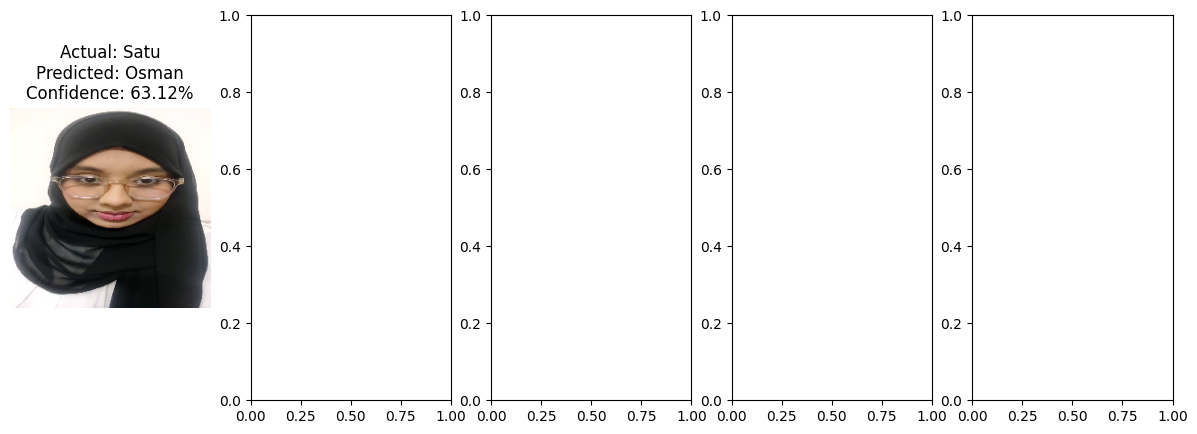

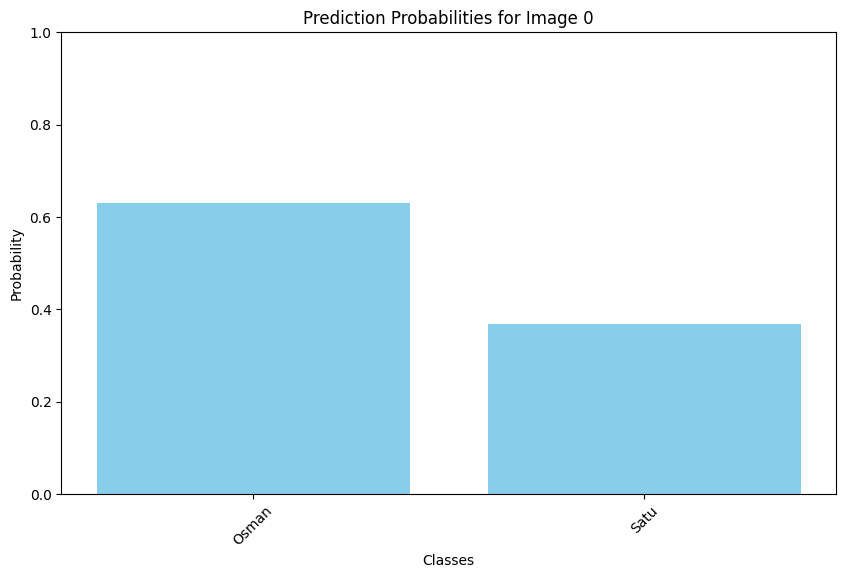

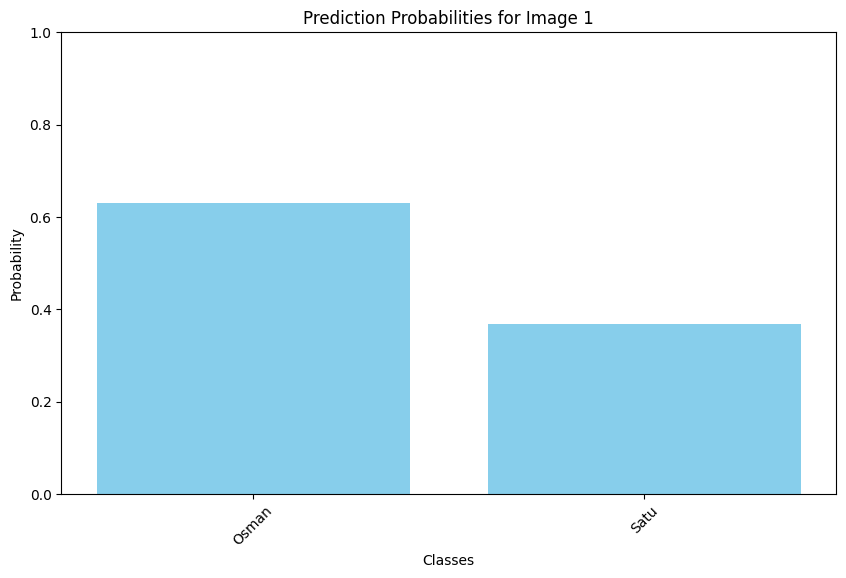

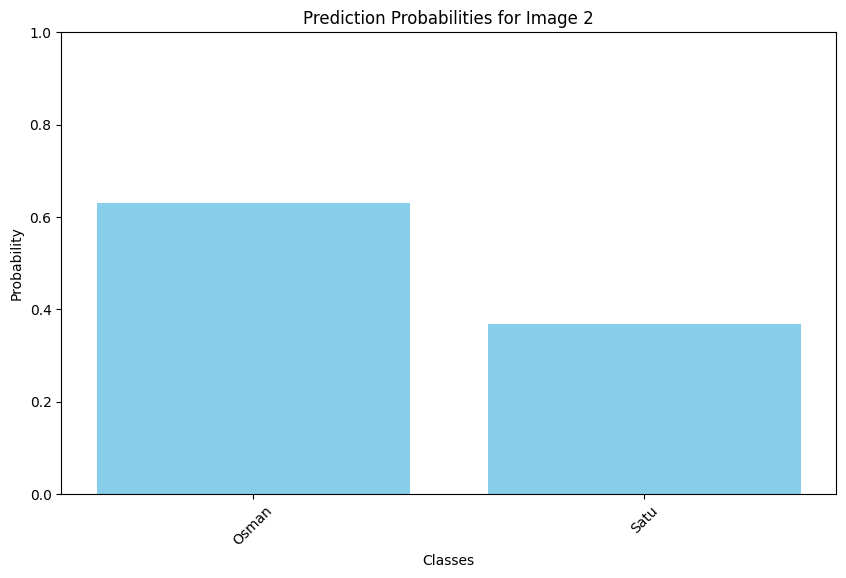

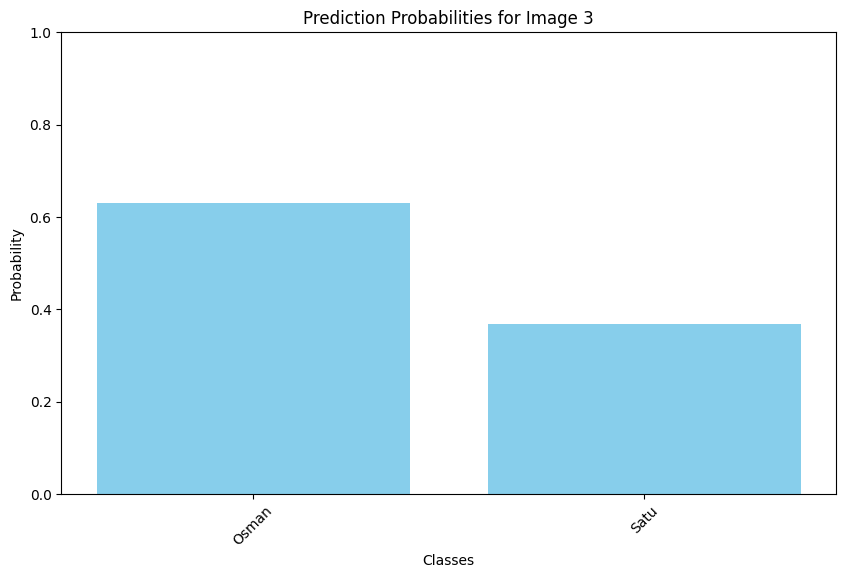

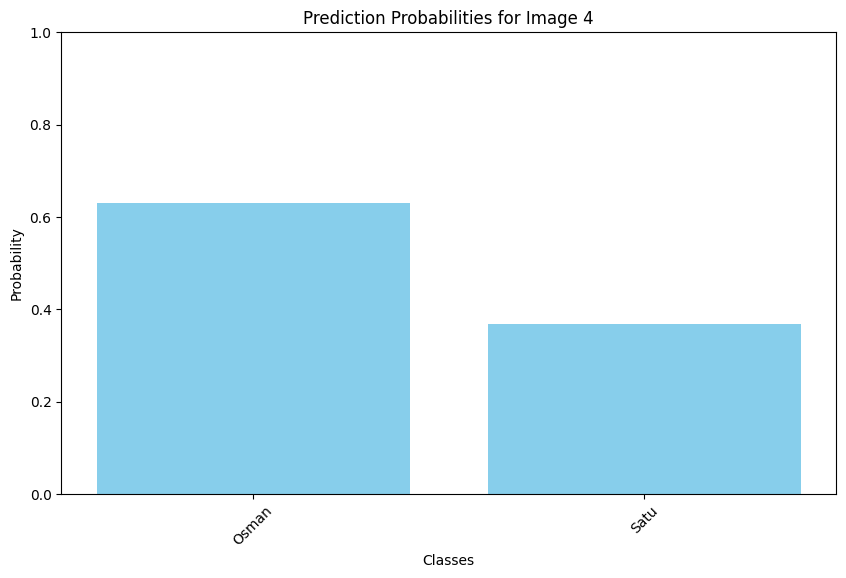

In [26]:
def plot_probability_bar_chart(preds, class_names, image_idx):
    # Create a bar chart of class probabilities for the selected image
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, preds[image_idx], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title(f'Prediction Probabilities for Image {image_idx}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Set y-axis to be between 0 and 1
    plt.show()

# Function to visualize predictions with probabilities and bar chart
def visualize_predictions_with_probabilities(model, generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i]
        true_label = class_names[int(labels[i])]
        predicted_label = class_names[int(pred_labels[i])]
        predicted_prob = np.max(preds[i])  # Highest probability
        
        axes[i].imshow(img)
        axes[i].set_title(f"Actual: {true_label}\nPredicted: {predicted_label}\nConfidence: {predicted_prob*100:.2f}%")
        axes[i].axis("off")
        
        # Add a probability bar chart for this image
        plot_probability_bar_chart(preds, class_names, i)
    
    plt.show()

# Example usage
visualize_predictions_with_probabilities(model, val_generator)